In [283]:
import pandas as pd
import numpy as np

# Load the datasets
train_data = pd.read_csv('risk-train.txt')
test_data = pd.read_csv('risk-test.txt')

# Display the first few rows and the shape of the training data
print(train_data.head())
print(train_data.shape)

# Display the first few rows and the shape of the test data
print(test_data.head())
print(test_data.shape)


  ORDER_ID\tCLASS\tB_EMAIL\tB_TELEFON\tB_BIRTHDATE\tFLAG_LRIDENTISCH\tFLAG_NEWSLETTER\tZ_METHODE\tZ_CARD_ART\tZ_CARD_VALID\tZ_LAST_NAME\tVALUE_ORDER\tWEEKDAY_ORDER\tTIME_ORDER\tAMOUNT_ORDER\tANUMMER_01\tANUMMER_02\tANUMMER_03\tANUMMER_04\tANUMMER_05\tANUMMER_06\tANUMMER_07\tANUMMER_08\tANUMMER_09\tANUMMER_10\tCHK_LADR\tCHK_RADR\tCHK_KTO\tCHK_CARD\tCHK_COOKIE\tCHK_IP\tFAIL_LPLZ\tFAIL_LORT\tFAIL_LPLZORTMATCH\tFAIL_RPLZ\tFAIL_RORT\tFAIL_RPLZORTMATCH\tSESSION_TIME\tNEUKUNDE\tAMOUNT_ORDER_PRE\tVALUE_ORDER_PRE\tDATE_LORDER\tMAHN_AKT\tMAHN_HOECHST
0  49917\tno\tyes\tno\t1/17/1973\tyes\tyes\tcheck...                                                                                                                                                                                                                                                                                                                                                                                                                 

In [284]:
# The data is tab-separated, as indicated by the \t in the above output
# Load the datasets with the correct delimiter
train_data = pd.read_csv('risk-train.txt', delimiter='\t')
test_data = pd.read_csv('risk-test.txt', delimiter='\t')

# Display the first few rows and the shape of the training data
print(train_data.head())
print(train_data.shape)

# Display the first few rows and the shape of the test data
print(test_data.head())
print(test_data.shape)


   ORDER_ID CLASS B_EMAIL B_TELEFON B_BIRTHDATE FLAG_LRIDENTISCH  \
0     49917    no     yes        no   1/17/1973              yes   
1     49919    no     yes       yes   12/8/1970               no   
2     49923    no     yes        no    4/3/1972              yes   
3     49924    no      no       yes    8/1/1966              yes   
4     49927    no     yes       yes  12/21/1969              yes   

  FLAG_NEWSLETTER    Z_METHODE Z_CARD_ART  Z_CARD_VALID  ... FAIL_RPLZ  \
0             yes        check          ?        5.2006  ...        no   
1              no  credit_card       Visa       12.2007  ...       yes   
2              no        check          ?       12.2007  ...        no   
3              no        check          ?        1.2007  ...        no   
4              no  credit_card   Eurocard       12.2006  ...        no   

   FAIL_RORT FAIL_RPLZORTMATCH SESSION_TIME  NEUKUNDE  AMOUNT_ORDER_PRE  \
0         no                no            8       yes                 0

In the dataset, missing values seem to be represented by a ?.
We can replace ? with np.nan for easier handling and then check for missing values

In [285]:
# Replacing '?' with NaN for better data manipulation
train_data.replace('?', np.nan, inplace=True)
test_data.replace('?', np.nan, inplace=True)

# Check for missing values in the training data
print(train_data.isnull().sum())

# Check for missing values in the test data
print(test_data.isnull().sum())


ORDER_ID                 0
CLASS                    0
B_EMAIL                  0
B_TELEFON                0
B_BIRTHDATE           2942
FLAG_LRIDENTISCH         0
FLAG_NEWSLETTER          0
Z_METHODE                0
Z_CARD_ART           18654
Z_CARD_VALID             0
Z_LAST_NAME          14808
VALUE_ORDER              0
WEEKDAY_ORDER            0
TIME_ORDER              20
AMOUNT_ORDER             0
ANUMMER_01               0
ANUMMER_02           22147
ANUMMER_03           26802
ANUMMER_04           28668
ANUMMER_05           29459
ANUMMER_06           29794
ANUMMER_07           29905
ANUMMER_08           29966
ANUMMER_09           29993
ANUMMER_10           30000
CHK_LADR                 0
CHK_RADR                 0
CHK_KTO                  0
CHK_CARD                 0
CHK_COOKIE               0
CHK_IP                   0
FAIL_LPLZ                0
FAIL_LORT                0
FAIL_LPLZORTMATCH        0
FAIL_RPLZ                0
FAIL_RORT                0
FAIL_RPLZORTMATCH        0
S

#### The columns ANUMMER_08, ANUMMER_09, and ANUMMER_10 has high percentages of missing values . The next thing would be to inspect the columns and get the percentage of the missing value to see its significance to the analysis of the data  and drop it if needed with the code below: 

In [287]:
#saving the order id to be used at the end of the code for the test dataset
order_ids = test_data['ORDER_ID']

In [288]:
# Convert the DATE_LORDER column to datetime, errors='coerce' will ensure NaN remains NaN
train_data['DATE_LORDER'] = pd.to_datetime(train_data['DATE_LORDER'], errors='coerce')

# Check the converted data
print(train_data['DATE_LORDER'].head())

0          NaT
1          NaT
2          NaT
3   2002-05-12
4          NaT
Name: DATE_LORDER, dtype: datetime64[ns]


In [289]:
# Convert the DATE_LORDER column to datetime, errors='coerce' will ensure NaN remains NaN
test_data['DATE_LORDER'] = pd.to_datetime(test_data['DATE_LORDER'], errors='coerce')

# Check the converted data
print(test_data['DATE_LORDER'].head())

0          NaT
1   2004-09-02
2          NaT
3   2003-12-24
4          NaT
Name: DATE_LORDER, dtype: datetime64[ns]


In [290]:
# Extracting a reference year which is ideal if we want a reducible results 
reference_year = train_data['DATE_LORDER'].dt.year.max()
reference_month = train_data[train_data['DATE_LORDER'].dt.year == reference_year]['DATE_LORDER'].dt.month.max()

print("Reference Year:", reference_year)
print("Reference Month:", reference_month)

Reference Year: 2005.0
Reference Month: 1


In [291]:
# Extracting a reference year which is ideal if we want a reducible results for the testdataset
test_reference_year = test_data['DATE_LORDER'].dt.year.max()
test_reference_month = test_data[train_data['DATE_LORDER'].dt.year == reference_year]['DATE_LORDER'].dt.month.max()

print("Test Reference Year:", test_reference_year)
print("Test Reference Month:", test_reference_month)

Test Reference Year: 2005.0
Test Reference Month: 12.0


/var/folders/_x/j3xz2p1j1cl67cr6ctg8pkn40000gn/T/ipykernel_26200/1342647913.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  test_reference_month = test_data[train_data['DATE_LORDER'].dt.year == reference_year]['DATE_LORDER'].dt.month.max()


In [292]:
columns_to_inspect = ['ANUMMER_06', 'ANUMMER_07', 'ANUMMER_08', 'ANUMMER_09', 'ANUMMER_10']

# Descriptive Statistics
print("Descriptive Statistics:\n", train_data[columns_to_inspect].describe())

# Value Counts (for the first few unique values)
for col in columns_to_inspect:
    print(f"\nValue Counts for {col}:\n", train_data[col].value_counts().head())

# Missing Value Percentage
missing_percentage = train_data[columns_to_inspect].isnull().sum() / len(train_data) * 100
print("\nMissing Value Percentage:\n", missing_percentage)


Descriptive Statistics:
        ANUMMER_10
count         0.0
mean          NaN
std           NaN
min           NaN
25%           NaN
50%           NaN
75%           NaN
max           NaN

Value Counts for ANUMMER_06:
 109102    3
507317    2
503367    2
303397    2
200576    2
Name: ANUMMER_06, dtype: int64

Value Counts for ANUMMER_07:
 104645    2
107171    2
106520    2
407255    2
503136    2
Name: ANUMMER_07, dtype: int64

Value Counts for ANUMMER_08:
 609500    2
208997    1
202697    1
107300    1
105958    1
Name: ANUMMER_08, dtype: int64

Value Counts for ANUMMER_09:
 109102    1
404645    1
208777    1
102681    1
106858    1
Name: ANUMMER_09, dtype: int64

Value Counts for ANUMMER_10:
 Series([], Name: ANUMMER_10, dtype: int64)

Missing Value Percentage:
 ANUMMER_06     99.313333
ANUMMER_07     99.683333
ANUMMER_08     99.886667
ANUMMER_09     99.976667
ANUMMER_10    100.000000
dtype: float64


In [293]:
#test dataset
test_columns_to_inspect = ['ANUMMER_06', 'ANUMMER_07', 'ANUMMER_08', 'ANUMMER_09', 'ANUMMER_10']

# Descriptive Statistics
print("Descriptive Statistics:\n", test_data[columns_to_inspect].describe())

# Value Counts (for the first few unique values)
for col in test_columns_to_inspect:
    print(f"\nValue Counts for {col}:\n", test_data[col].value_counts().head())

# Missing Value Percentage
test_missing_percentage = test_data[columns_to_inspect].isnull().sum() / len(test_data) * 100
print("\nTest Missing Value Percentage:\n", test_missing_percentage)


Descriptive Statistics:
        ANUMMER_06 ANUMMER_07 ANUMMER_08 ANUMMER_09 ANUMMER_10
count         145         65         29         18         13
unique        126         62         29         18         13
top        207703     408605     502089     401373     500959
freq            2          3          1          1          1

Value Counts for ANUMMER_06:
 207703    2
309102    2
406406    2
102697    2
104341    2
Name: ANUMMER_06, dtype: int64

Value Counts for ANUMMER_07:
 408605    3
109670    2
108889    1
404504    1
201796    1
Name: ANUMMER_07, dtype: int64

Value Counts for ANUMMER_08:
 502089    1
201796    1
402294    1
207317    1
405897    1
Name: ANUMMER_08, dtype: int64

Value Counts for ANUMMER_09:
 401373    1
102845    1
409053    1
101856    1
400914    1
Name: ANUMMER_09, dtype: int64

Value Counts for ANUMMER_10:
 500959    1
205966    1
406590    1
100959    1
104765    1
Name: ANUMMER_10, dtype: int64

Test Missing Value Percentage:
 ANUMMER_06    99.275
A

The columns ANUMMER_08, ANUMMER_09, and ANUMMER_10 have extremely high percentages of missing values, making them nearly useless for most analyses or modeling tasks. 

In [294]:
# Columns to drop
columns_to_drop = ['ORDER_ID', 'ANUMMER_06', 'ANUMMER_07', 'ANUMMER_08', 'ANUMMER_09', 'ANUMMER_10']

# Dropping only the columns that exist in train_data from the columns_to_drop list
train_data = train_data.drop(columns=[col for col in columns_to_drop if col in train_data.columns])

# Review the dataframe after dropping
print(train_data.head())


  CLASS B_EMAIL B_TELEFON B_BIRTHDATE FLAG_LRIDENTISCH FLAG_NEWSLETTER  \
0    no     yes        no   1/17/1973              yes             yes   
1    no     yes       yes   12/8/1970               no              no   
2    no     yes        no    4/3/1972              yes              no   
3    no      no       yes    8/1/1966              yes              no   
4    no     yes       yes  12/21/1969              yes              no   

     Z_METHODE Z_CARD_ART  Z_CARD_VALID Z_LAST_NAME  ...  FAIL_RPLZ FAIL_RORT  \
0        check        NaN        5.2006         NaN  ...         no        no   
1  credit_card       Visa       12.2007         yes  ...        yes        no   
2        check        NaN       12.2007         NaN  ...         no        no   
3        check        NaN        1.2007         NaN  ...         no        no   
4  credit_card   Eurocard       12.2006         yes  ...         no        no   

  FAIL_RPLZORTMATCH  SESSION_TIME  NEUKUNDE AMOUNT_ORDER_PRE VALUE_O

In [295]:
# Columns to drop
test_columns_to_drop = ['ORDER_ID', 'ANUMMER_06', 'ANUMMER_07', 'ANUMMER_08', 'ANUMMER_09', 'ANUMMER_10']

# Dropping only the columns that exist in train_data from the columns_to_drop list
test_data = test_data.drop(columns=[col for col in test_columns_to_drop if col in test_data.columns])

# Review the dataframe after dropping
print(test_data.head())


  B_EMAIL B_TELEFON B_BIRTHDATE FLAG_LRIDENTISCH FLAG_NEWSLETTER    Z_METHODE  \
0     yes        no   7/22/1979               no              no  credit_card   
1      no        no    2/5/1973               no              no  credit_card   
2     yes        no   7/19/1970              yes              no        check   
3     yes        no    4/9/1985              yes              no  credit_card   
4      no       yes    4/7/1963               no              no   debit_note   

  Z_CARD_ART  Z_CARD_VALID Z_LAST_NAME  VALUE_ORDER  ... FAIL_RPLZ FAIL_RORT  \
0       Visa        2.2005         yes         64.5  ...        no        no   
1   Eurocard        4.2005         yes         74.3  ...        no        no   
2        NaN        8.2005         NaN         42.8  ...       yes        no   
3   Eurocard        7.2006         yes         42.8  ...        no        no   
4        NaN        5.2007         yes          6.5  ...       yes        no   

   FAIL_RPLZORTMATCH  SESSION_TI

In [296]:
print(train_data.isnull().sum())

CLASS                    0
B_EMAIL                  0
B_TELEFON                0
B_BIRTHDATE           2942
FLAG_LRIDENTISCH         0
FLAG_NEWSLETTER          0
Z_METHODE                0
Z_CARD_ART           18654
Z_CARD_VALID             0
Z_LAST_NAME          14808
VALUE_ORDER              0
WEEKDAY_ORDER            0
TIME_ORDER              20
AMOUNT_ORDER             0
ANUMMER_01               0
ANUMMER_02           22147
ANUMMER_03           26802
ANUMMER_04           28668
ANUMMER_05           29459
CHK_LADR                 0
CHK_RADR                 0
CHK_KTO                  0
CHK_CARD                 0
CHK_COOKIE               0
CHK_IP                   0
FAIL_LPLZ                0
FAIL_LORT                0
FAIL_LPLZORTMATCH        0
FAIL_RPLZ                0
FAIL_RORT                0
FAIL_RPLZORTMATCH        0
SESSION_TIME             0
NEUKUNDE                 0
AMOUNT_ORDER_PRE         0
VALUE_ORDER_PRE          0
DATE_LORDER          15856
MAHN_AKT             15856
M

In [297]:
# Imputing numerical columns with the median
numerical_cols = train_data.select_dtypes(include=['float64', 'int64']).columns
for col in numerical_cols:
    train_data[col].fillna(train_data[col].median(), inplace=True)

# Imputing categorical columns with the mode
categorical_cols = train_data.select_dtypes(include=['object']).columns
for col in categorical_cols:
    train_data[col].fillna(train_data[col].mode()[0], inplace=True)

# Verify the imputation
print(train_data.isnull().sum())


CLASS                    0
B_EMAIL                  0
B_TELEFON                0
B_BIRTHDATE              0
FLAG_LRIDENTISCH         0
FLAG_NEWSLETTER          0
Z_METHODE                0
Z_CARD_ART               0
Z_CARD_VALID             0
Z_LAST_NAME              0
VALUE_ORDER              0
WEEKDAY_ORDER            0
TIME_ORDER               0
AMOUNT_ORDER             0
ANUMMER_01               0
ANUMMER_02               0
ANUMMER_03               0
ANUMMER_04               0
ANUMMER_05               0
CHK_LADR                 0
CHK_RADR                 0
CHK_KTO                  0
CHK_CARD                 0
CHK_COOKIE               0
CHK_IP                   0
FAIL_LPLZ                0
FAIL_LORT                0
FAIL_LPLZORTMATCH        0
FAIL_RPLZ                0
FAIL_RORT                0
FAIL_RPLZORTMATCH        0
SESSION_TIME             0
NEUKUNDE                 0
AMOUNT_ORDER_PRE         0
VALUE_ORDER_PRE          0
DATE_LORDER          15856
MAHN_AKT                 0
M

In [298]:
#test dataset
# Imputing numerical columns with the median
test_numerical_cols = test_data.select_dtypes(include=['float64', 'int64']).columns
for col in test_numerical_cols:
    test_data[col].fillna(test_data[col].median(), inplace=True)

# Imputing categorical columns with the mode
test_categorical_cols = test_data.select_dtypes(include=['object']).columns
for col in test_categorical_cols:
    test_data[col].fillna(test_data[col].mode()[0], inplace=True)

# Verify the imputation
print(test_data.isnull().sum())


B_EMAIL                  0
B_TELEFON                0
B_BIRTHDATE              0
FLAG_LRIDENTISCH         0
FLAG_NEWSLETTER          0
Z_METHODE                0
Z_CARD_ART               0
Z_CARD_VALID             0
Z_LAST_NAME              0
VALUE_ORDER              0
WEEKDAY_ORDER            0
TIME_ORDER               0
AMOUNT_ORDER             0
ANUMMER_01               0
ANUMMER_02               0
ANUMMER_03               0
ANUMMER_04               0
ANUMMER_05               0
CHK_LADR                 0
CHK_RADR                 0
CHK_KTO                  0
CHK_CARD                 0
CHK_COOKIE               0
CHK_IP                   0
FAIL_LPLZ                0
FAIL_LORT                0
FAIL_LPLZORTMATCH        0
FAIL_RPLZ                0
FAIL_RORT                0
FAIL_RPLZORTMATCH        0
SESSION_TIME             0
NEUKUNDE                 0
AMOUNT_ORDER_PRE         0
VALUE_ORDER_PRE          0
DATE_LORDER          10579
MAHN_AKT                 0
MAHN_HOECHST             0
d

In [299]:
print(train_data.head())
print(train_data.shape)

  CLASS B_EMAIL B_TELEFON B_BIRTHDATE FLAG_LRIDENTISCH FLAG_NEWSLETTER  \
0    no     yes        no   1/17/1973              yes             yes   
1    no     yes       yes   12/8/1970               no              no   
2    no     yes        no    4/3/1972              yes              no   
3    no      no       yes    8/1/1966              yes              no   
4    no     yes       yes  12/21/1969              yes              no   

     Z_METHODE Z_CARD_ART  Z_CARD_VALID Z_LAST_NAME  ...  FAIL_RPLZ FAIL_RORT  \
0        check   Eurocard        5.2006         yes  ...         no        no   
1  credit_card       Visa       12.2007         yes  ...        yes        no   
2        check   Eurocard       12.2007         yes  ...         no        no   
3        check   Eurocard        1.2007         yes  ...         no        no   
4  credit_card   Eurocard       12.2006         yes  ...         no        no   

  FAIL_RPLZORTMATCH  SESSION_TIME  NEUKUNDE AMOUNT_ORDER_PRE VALUE_O

In [300]:
X = train_data.iloc[:, 1:]
y = train_data.iloc[:, 0]
print(f'X:{X.head()}, \n \n y:{y.head()}')

X:  B_EMAIL B_TELEFON B_BIRTHDATE FLAG_LRIDENTISCH FLAG_NEWSLETTER    Z_METHODE  \
0     yes        no   1/17/1973              yes             yes        check   
1     yes       yes   12/8/1970               no              no  credit_card   
2     yes        no    4/3/1972              yes              no        check   
3      no       yes    8/1/1966              yes              no        check   
4     yes       yes  12/21/1969              yes              no  credit_card   

  Z_CARD_ART  Z_CARD_VALID Z_LAST_NAME  VALUE_ORDER  ... FAIL_RPLZ FAIL_RORT  \
0   Eurocard        5.2006         yes        17.80  ...        no        no   
1       Visa       12.2007         yes        18.20  ...       yes        no   
2   Eurocard       12.2007         yes        10.80  ...        no        no   
3   Eurocard        1.2007         yes        54.50  ...        no        no   
4   Eurocard       12.2006         yes        19.99  ...        no        no   

   FAIL_RPLZORTMATCH  SESSION_

In [301]:
from sklearn.preprocessing import OneHotEncoder

# Defining the columns that need one-hot encoding
categorical_cols = ['B_EMAIL', 'B_TELEFON', 'FLAG_LRIDENTISCH', 'FLAG_NEWSLETTER', 'Z_METHODE', 'Z_CARD_ART', 'Z_LAST_NAME', 'CHK_LADR', 'CHK_RADR', 'CHK_KTO', 'CHK_CARD', 'CHK_COOKIE', 'CHK_IP', 'FAIL_LPLZ', 'FAIL_LORT', 'FAIL_LPLZORTMATCH', 'FAIL_RPLZ', 'FAIL_RORT', 'FAIL_RPLZORTMATCH', 'NEUKUNDE']

# Initializing the encoder
encoder = OneHotEncoder(drop='first', sparse_output=False)

# Applying the encoder and convert to dataframe
encoded_data = encoder.fit_transform(X[categorical_cols])
# Replace the problematic line with the updated method:
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(categorical_cols))

# Drop the original categorical columns and concatenate the encoded dataframe
X.drop(columns=categorical_cols, inplace=True)
X = pd.concat([X, encoded_df], axis=1)


In [302]:
#Test dataset
from sklearn.preprocessing import OneHotEncoder

# Defining the columns that need one-hot encoding
test_categorical_cols = ['B_EMAIL', 'B_TELEFON', 'FLAG_LRIDENTISCH', 'FLAG_NEWSLETTER', 'Z_METHODE', 'Z_CARD_ART', 'Z_LAST_NAME', 'CHK_LADR', 'CHK_RADR', 'CHK_KTO', 'CHK_CARD', 'CHK_COOKIE', 'CHK_IP', 'FAIL_LPLZ', 'FAIL_LORT', 'FAIL_LPLZORTMATCH', 'FAIL_RPLZ', 'FAIL_RORT', 'FAIL_RPLZORTMATCH', 'NEUKUNDE']

# Initializing the encoder
test_encoder = OneHotEncoder(drop='first', sparse_output=False)

# Applying the encoder and convert to dataframe
test_encoded_data = test_encoder.fit_transform(test_data[test_categorical_cols])
# Replace the problematic line with the updated method:
test_encoded_df = pd.DataFrame(test_encoded_data, columns=test_encoder.get_feature_names_out(test_categorical_cols))

# Drop the original categorical columns and concatenate the encoded dataframe
test_data.drop(columns=test_categorical_cols, inplace=True)
test_data = pd.concat([test_data, test_encoded_df], axis=1)


##  Preprocess Date/Time Attributes

In [303]:
#Converting B_BIRTHDATE to age
from datetime import datetime

# Convert B_BIRTHDATE to datetime object
X['B_BIRTHDATE'] = pd.to_datetime(X['B_BIRTHDATE'])

# Calculate age
X['AGE'] = reference_year - X['B_BIRTHDATE'].dt.year
X.drop(columns=['B_BIRTHDATE'], inplace=True)


In [305]:
#Converting B_BIRTHDATE to age
from datetime import datetime

# Convert B_BIRTHDATE to datetime object
test_data['B_BIRTHDATE'] = pd.to_datetime(test_data['B_BIRTHDATE'])

# Calculate age
test_data['AGE'] = test_reference_year - test_data['B_BIRTHDATE'].dt.year
test_data.drop(columns=['B_BIRTHDATE'], inplace=True)


In [306]:
print(X['Z_CARD_VALID'].unique())


[ 5.2006 12.2007  1.2007 12.2006  2.2007 11.2007  5.2005  9.2007 11.2006
  2.2006  6.2006  3.2007  6.2005  6.2007  3.2005  4.2005 11.2005  4.2006
  3.2006  9.2006 12.2005  8.2007 10.2006  2.2005  7.2007 10.2005  7.2005
  8.2005  9.2005  7.2006  1.2006  1.2005  8.2006 10.2007  4.2007  5.2007]


In [307]:
print(X['Z_CARD_VALID'].dtype)

float64


In [308]:
# Convert the Z_CARD_VALID column to string
X['Z_CARD_VALID'] = X['Z_CARD_VALID'].astype(str)

# Splitting Z_CARD_VALID into month and year
X[['CARD_MONTH', 'CARD_YEAR']] = X['Z_CARD_VALID'].str.split('.', expand=True).astype(float)

# Calculating months until expiration from current year and month

X['MONTHS_TILL_EXPIRY'] = (X['CARD_YEAR'] - reference_year) * 12 + X['CARD_MONTH'] - reference_month

# Drop the original 'Z_CARD_VALID' column
X = X.drop(columns=['Z_CARD_VALID'])
print(X['MONTHS_TILL_EXPIRY'])

0        16.0
1        35.0
2        35.0
3        24.0
4        23.0
         ... 
29995     5.0
29996     4.0
29997    22.0
29998     3.0
29999    15.0
Name: MONTHS_TILL_EXPIRY, Length: 30000, dtype: float64


In [309]:
#test
# Convert the Z_CARD_VALID column to string
test_data['Z_CARD_VALID'] = test_data['Z_CARD_VALID'].astype(str)

# Splitting Z_CARD_VALID into month and year
test_data[['CARD_MONTH', 'CARD_YEAR']] = test_data['Z_CARD_VALID'].str.split('.', expand=True).astype(float)

# Calculating months until expiration from current year and month

test_data['MONTHS_TILL_EXPIRY'] = (test_data['CARD_YEAR'] - test_reference_year) * 12 + test_data['CARD_MONTH'] - test_reference_month

# Drop the original 'Z_CARD_VALID' column
test_data = test_data.drop(columns=['Z_CARD_VALID'])
print(test_data['MONTHS_TILL_EXPIRY'])

0       -10.0
1        -8.0
2        -4.0
3         7.0
4        17.0
         ... 
19995    -5.0
19996    15.0
19997    22.0
19998    -7.0
19999    24.0
Name: MONTHS_TILL_EXPIRY, Length: 20000, dtype: float64


In [310]:
def months_difference(end, start):
    return (end.year - start.year) * 12 + end.month - start.month

# explicitly converting reference_year to an integer will ensure that the pd.Timestamp() function receives the correct type for its argument
reference_year = int(reference_year)

# Handle NaN values in DATE_LORDER column by calculating median difference and filling them
median_diff_date = X['DATE_LORDER'].median()
X['DATE_LORDER'].fillna(median_diff_date, inplace=True)

# Calculate the months since last order
X['MONTHS_SINCE_LAST_ORDER'] = [months_difference(pd.Timestamp(reference_year, 12, 31), date) for date in X['DATE_LORDER']]

# Drop the original 'DATE_LORDER' column
X.drop(columns=['DATE_LORDER'], inplace=True)


In [311]:
#test
def test_months_difference(end, start):
    return (end.year - start.year) * 12 + end.month - start.month

# explicitly converting reference_year to an integer will ensure that the pd.Timestamp() function receives the correct type for its argument
test_reference_year = int(test_reference_year)

# Handle NaN values in DATE_LORDER column by calculating median difference and filling them
test_median_diff_date = test_data['DATE_LORDER'].median()
test_data['DATE_LORDER'].fillna(test_median_diff_date, inplace=True)

# Calculate the months since last order
test_data['MONTHS_SINCE_LAST_ORDER'] = [test_months_difference(pd.Timestamp(test_reference_year, 12, 31), date) for date in test_data['DATE_LORDER']]

# Drop the original 'DATE_LORDER' column
test_data.drop(columns=['DATE_LORDER'], inplace=True)


In [312]:
print(X['MONTHS_SINCE_LAST_ORDER'])

0        35
1        35
2        35
3        43
4        35
         ..
29995    45
29996    54
29997    35
29998    53
29999    59
Name: MONTHS_SINCE_LAST_ORDER, Length: 30000, dtype: int64


### This will convert all the necessary categorical and date/time features to a format suitable for machine learning algorithms. 

In [313]:
# Define a mapping from weekday to number
weekday_mapping = {
    'Monday': 1,
    'Tuesday': 2,
    'Wednesday': 3,
    'Thursday': 4,
    'Friday': 5,
    'Saturday': 6,
    'Sunday': 7
}

# Apply the mapping to the training  data
X['WEEKDAY_ORDER'] = X['WEEKDAY_ORDER'].map(weekday_mapping)

# Checking for other non-numeric columns
non_numeric_cols = X.select_dtypes(exclude=[np.number]).columns
print("Non-Numeric Columns:", non_numeric_cols)



Non-Numeric Columns: Index(['TIME_ORDER', 'ANUMMER_02', 'ANUMMER_03', 'ANUMMER_04', 'ANUMMER_05',
       'MAHN_AKT', 'MAHN_HOECHST'],
      dtype='object')


In [314]:
#test
# Define a mapping from weekday to number
test_weekday_mapping = {
    'Monday': 1,
    'Tuesday': 2,
    'Wednesday': 3,
    'Thursday': 4,
    'Friday': 5,
    'Saturday': 6,
    'Sunday': 7
}

# Apply the mapping to the training  data
test_data['WEEKDAY_ORDER'] = test_data['WEEKDAY_ORDER'].map(test_weekday_mapping)

# Checking for other non-numeric columns
test_non_numeric_cols = test_data.select_dtypes(exclude=[np.number]).columns
print("Non-Numeric Columns:", test_non_numeric_cols)



Non-Numeric Columns: Index(['TIME_ORDER', 'ANUMMER_02', 'ANUMMER_03', 'ANUMMER_04', 'ANUMMER_05',
       'MAHN_AKT', 'MAHN_HOECHST'],
      dtype='object')


In [315]:
print("Unique values in :", X['WEEKDAY_ORDER'].unique())


Unique values in : [6 3 5 2 4 7 1]


In [254]:
#after getting the remaining Non-Numeric Columns we-
#-would print and examine the unique values in them
columns_to_check = ['TIME_ORDER', 'ANUMMER_02', 'ANUMMER_03', 'ANUMMER_04', 'ANUMMER_05', 'MAHN_AKT', 'MAHN_HOECHST']

for col in columns_to_check:
    unique_values = X[col].unique()
    print(f"First 10 unique values in {col}: {unique_values[:10]}")


First 10 unique values in TIME_ORDER: ['9:13' '17:36' '11:13' '2:07' '23:46' '13:13' '14:43' '8:51' '16:17'
 '16:43']
First 10 unique values in ANUMMER_02: ['201216' '401285' '100147' '102089' '204921' '406774' '206310' '404645'
 '408605' '408470']
First 10 unique values in ANUMMER_03: ['200578' '400450' '409725' '208777' '508777' '203772' '509121' '401835'
 '308997' '108500']
First 10 unique values in ANUMMER_04: ['209725' '409333' '508997' '307344' '502496' '109121' '409725' '109725'
 '102133' '104341']
First 10 unique values in ANUMMER_05: ['201373' '308997' '307344' '307699' '605685' '204341' '309121' '409101'
 '508777' '404258']
First 10 unique values in MAHN_AKT: ['0' '1' '3' '2']
First 10 unique values in MAHN_HOECHST: ['0' '1' '2' '3']


In [316]:
#after getting the remaining Non-Numeric Columns we-
#-would print and examine the unique values in them
test_columns_to_check = ['TIME_ORDER', 'ANUMMER_02', 'ANUMMER_03', 'ANUMMER_04', 'ANUMMER_05', 'MAHN_AKT', 'MAHN_HOECHST']

for col in test_columns_to_check:
    test_unique_values = test_data[col].unique()
    print(f"First 10 unique values in {col}: {test_unique_values[:10]}")


First 10 unique values in TIME_ORDER: ['6:42' '14:44' '18:40' '14:22' '1:54' '21:16' '1:38' '23:40' '21:07'
 '14:52']
First 10 unique values in ANUMMER_02: ['301371' '103776' '403367' '206520' '402677' '107570' '404077' '400953'
 '400914' '201373']
First 10 unique values in ANUMMER_03: ['401223' '206310' '404765' '402123' '501893' '206821' '402116' '405643'
 '102677' '507344']
First 10 unique values in ANUMMER_04: ['504935' '207317' '604485' '200061' '503367' '208397' '603639' '507359'
 '508997' '402454']
First 10 unique values in ANUMMER_05: ['405580' '407255' '307699' '108499' '405378' '206520' '103136' '408777'
 '600476' '405284']
First 10 unique values in MAHN_AKT: ['0' '1' '3' '2']
First 10 unique values in MAHN_HOECHST: ['0' '1' '3' '2']


## Given this printed data,these are the things i will do for preprocessing:

1, Convert TIME_ORDER to minutes past midnight.

2, Convert ANUMMER_02, ANUMMER_03, ANUMMER_04, ANUMMER_05 to numerical values or perform OneHotEncoding.

3,Treat MAHN_AKT and MAHN_HOECHST as numerical values.

In [317]:
# Converting the TIME_ORDER column to a numerical value representing minutes past midnight

def time_to_minutes(time_str):
    """
    Converts a time string in the format 'Hour:Minute' to minutes past midnight.
    
    Args:
    - time_str (str): A string representing time in the format 'Hour:Minute'.
    
    Returns:
    - int: Number of minutes past midnight.
    """
    hours, minutes = map(int, time_str.split(':'))
    return hours * 60 + minutes

# Applying the function to the TIME_ORDER column
X['TIME_ORDER'] = X['TIME_ORDER'].apply(time_to_minutes)



In [319]:
#test
# Converting the TIME_ORDER column to a numerical value representing minutes past midnight

def test_time_to_minutes(time_str):
    """
    Converts a time string in the format 'Hour:Minute' to minutes past midnight.
    
    Args:
    - time_str (str): A string representing time in the format 'Hour:Minute'.
    
    Returns:
    - int: Number of minutes past midnight.
    """
    hours, minutes = map(int, time_str.split(':'))
    return hours * 60 + minutes

# Applying the function to the TIME_ORDER column
test_data['TIME_ORDER'] = test_data['TIME_ORDER'].apply(test_time_to_minutes)



In [320]:
# Defining the columns to check
columns_to_check = ['TIME_ORDER', 'ANUMMER_02', 'ANUMMER_03', 'ANUMMER_04', 'ANUMMER_05', 'MAHN_AKT', 'MAHN_HOECHST']

# Checking the number of unique values for each column
for column in columns_to_check:
    num_unique_values = X[column].nunique()
    print(f"{column} has {num_unique_values} unique values.")


TIME_ORDER has 1439 unique values.
ANUMMER_02 has 560 unique values.
ANUMMER_03 has 560 unique values.
ANUMMER_04 has 498 unique values.
ANUMMER_05 has 347 unique values.
MAHN_AKT has 4 unique values.
MAHN_HOECHST has 4 unique values.


In [321]:
#test
# Defining the columns to check
test_columns_to_check = ['TIME_ORDER', 'ANUMMER_02', 'ANUMMER_03', 'ANUMMER_04', 'ANUMMER_05', 'MAHN_AKT', 'MAHN_HOECHST']

# Checking the number of unique values for each column
for column in test_columns_to_check:
    test_num_unique_values = test_data[column].nunique()
    print(f"{column} has {test_num_unique_values} unique values.")


TIME_ORDER has 1439 unique values.
ANUMMER_02 has 560 unique values.
ANUMMER_03 has 544 unique values.
ANUMMER_04 has 444 unique values.
ANUMMER_05 has 268 unique values.
MAHN_AKT has 4 unique values.
MAHN_HOECHST has 4 unique values.


#### 1, 
For the ANUMMER_02, ANUMMER_03, ANUMMER_04, and ANUMMER_05 columns, One-hot encoding them might introduce too many new features but im still going to one hot encode it and i could treat them like numerical for simplicity if needed.
#### 2,
We would extract the hour from TIME_ORDER as a new feature. This will convert the 1439 unique values down to just 24.
#### 3
Then One-hot encode MAHN_AKT and MAHN_HOECHST.

In [322]:
print(X['TIME_ORDER'].dtype)
print(X['TIME_ORDER'].unique)

int64
<bound method Series.unique of 0         553
1        1056
2         673
3         127
4        1426
         ... 
29995    1101
29996     951
29997     637
29998     112
29999    1234
Name: TIME_ORDER, Length: 30000, dtype: int64>


In [323]:
X['HOUR_ORDER'] = X['TIME_ORDER'] // 60


In [324]:
#Dropping the original TIME_ORDER column
X.drop('TIME_ORDER', axis=1, inplace=True)


In [325]:
#test
test_data['HOUR_ORDER'] = test_data['TIME_ORDER'] // 60
#Dropping the original TIME_ORDER column
test_data.drop('TIME_ORDER', axis=1, inplace=True)


In [326]:
# Columns to be one-hot encoded
ohe_columns = ['MAHN_AKT', 'MAHN_HOECHST', 'ANUMMER_02', 'ANUMMER_03', 'ANUMMER_04', 'ANUMMER_05']


In [327]:
#test
# Columns to be one-hot encoded
test_ohe_columns = ['MAHN_AKT', 'MAHN_HOECHST', 'ANUMMER_02', 'ANUMMER_03', 'ANUMMER_04', 'ANUMMER_05']


In [328]:
from sklearn.model_selection import train_test_split
#splitting to training and validation subset
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


In [329]:
#applying one-hot encoding on the training set
X_train_encoded = pd.get_dummies(X_train, columns=ohe_columns)

# And on the validation set
X_val_encoded = pd.get_dummies(X_val, columns=ohe_columns)
# Find missing columns
missing_cols = set(X_train_encoded.columns) - set(X_val_encoded.columns)

# Add missing columns to validation set with default value of 0
df_missing_cols = pd.DataFrame(0, index=X_val_encoded.index, columns=list(missing_cols))

# Concatenate the original X_val_encoded with the missing columns
X_val_encoded = pd.concat([X_val_encoded, df_missing_cols], axis=1)

# Reordering the columns to match the training set
X_val_encoded = X_val_encoded[X_train_encoded.columns]

# Copying the dataframes to reduce fragmentation
X_train_encoded = X_train_encoded.copy()
X_val_encoded = X_val_encoded.copy()


In [330]:
#test
#applying one-hot encoding on the test set
test_data_encoded = pd.get_dummies(test_data, columns=test_ohe_columns)

# Find missing columns
test_missing_cols = set(X_train_encoded.columns) - set(test_data_encoded.columns)

# Add missing columns to test set with default value of 0
test_df_missing_cols = pd.DataFrame(0, index=test_data_encoded.index, columns=list(test_missing_cols))

# Concatenate the original test_encoded with the missing columns
test_data_encoded = pd.concat([test_data_encoded, test_df_missing_cols], axis=1)

# Reordering the columns to match the training set
test_data_encoded = test_data_encoded[X_train_encoded.columns]

# Copying the dataframes to reduce fragmentation
test_data_encoded = test_data_encoded.copy()


In [333]:
print("X_train_encoded shape:", X_train_encoded.shape)
print("y_train shape:", y_train.shape)
print("test_data_encoded shape:", test_data_encoded.shape)

X_train_encoded shape: (24000, 1925)
y_train shape: (24000,)
test_data_encoded shape: (20000, 1925)


In [334]:
print("NaN values in X_encoded", X_train_encoded.isna().sum())

NaN values in X_encoded VALUE_ORDER          0
WEEKDAY_ORDER        0
AMOUNT_ORDER         0
ANUMMER_01           0
SESSION_TIME         0
                    ..
ANUMMER_05_607699    0
ANUMMER_05_608801    0
ANUMMER_05_608889    0
ANUMMER_05_609500    0
ANUMMER_05_609725    0
Length: 1925, dtype: int64


In [335]:
print("NaN values in test_data_encoded", test_data_encoded.isna().sum())

NaN values in test_data_encoded VALUE_ORDER          0
WEEKDAY_ORDER        0
AMOUNT_ORDER         0
ANUMMER_01           0
SESSION_TIME         0
                    ..
ANUMMER_05_607699    0
ANUMMER_05_608801    0
ANUMMER_05_608889    0
ANUMMER_05_609500    0
ANUMMER_05_609725    0
Length: 1925, dtype: int64


## The next steps is to use the Logistic Regression Model:

#### 1,
Data Preprocessing: Since logistic regression is sensitive to feature scaling, we'll first scale our data.
#### 2,
Model Training: We'll use the LogisticRegression from sklearn to train the model on the training data.
#### 3'
Model Evaluation: We'll evaluate the model on the validation data.
#### 4,
Interpretation: Based on the evaluation, we'll make decisions about next steps.

In [337]:
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

# Fitting on training data and transform
X_train_scaled = scaler.fit_transform(X_train_encoded)


In [338]:
#Training the Logistic Regression Model:
from sklearn.linear_model import LogisticRegression

# Initialize and train the model
logreg = LogisticRegression(max_iter=1000, random_state=42)
logreg.fit(X_train_scaled, y_train)


LogisticRegression(max_iter=1000, random_state=42)

In [339]:
#Evaluating Model Performance
from sklearn.metrics import accuracy_score
X_val_scaled = scaler.transform(X_val_encoded)
# Predicting on the validation set
y_val_pred = logreg.predict(X_val_scaled)

# Calculating accuracy
accuracy = accuracy_score(y_val, y_val_pred)
print(f"Validation Accuracy: {accuracy:.3f}")


Validation Accuracy: 0.937


In [340]:
from sklearn.metrics import classification_report


# Predict on validation data
y_val_pred = logreg.predict(X_val_scaled)

# Print classification report
report_logis = classification_report(y_val, y_val_pred, target_names=['no', 'yes'])
print(report_logis)


              precision    recall  f1-score   support

          no       0.95      0.99      0.97      5669
         yes       0.15      0.03      0.05       331

    accuracy                           0.94      6000
   macro avg       0.55      0.51      0.51      6000
weighted avg       0.90      0.94      0.92      6000



### Here are some key takeaways from the classification report:

Precision for 'yes': This is quite low at 0.15. Precision indicates out of all instances predicted as 'yes', only 15% were actually 'yes'. This means that when the model says something is 'yes', there's a good chance it's not.

Recall for 'yes': This is also quite low at 0.03. Recall indicates out of all actual 'yes' instances, the model could only correctly predict 3% of them. This means the model is missing out on a lot of actual 'yes' cases.

F1-score for 'yes': Combines precision and recall into a single metric, which is 0.05 for 'yes', confirming that the performance for this class is poor.

The model has a high accuracy of 0.94 mainly because it's really good at predicting the 'no' class (which appears to be the dominant class given the provided data).

The imbalanced nature of the dataset (5669 'no' vs 331 'yes') might be contributing to this skewed performance. In imbalanced datasets, machine learning algorithms tend to favor the dominant class.

### Next steps that would be done will be:
#### 1, Predicting Probabilities:
We will begin by using the trained logistic regression model to predict the probability estimates for each class on the validation set.  then extract the probabilities for the 'yes' (high risk) class.
#### 2, Defining a Cost Calculation Function:
Next, we'll define a function that calculates the misclassification cost based on the provided cost matrix.
#### 3, Finding the Optimal Threshold:
we'll loop through potential threshold values to determine which threshold minimizes the misclassification cost.
#### 4,  Using the Optimal Threshold:
Once we've found the optimal threshold, we'll use it to make predictions on our validation set.

In [341]:
# Predicting probabilities for the 'yes' class
y_val_prob = logreg.predict_proba(X_val_scaled)[:, 1]

def calculate_cost(y_true, y_pred):
    """
    This function computes the misclassification cost based on the cost matrix:
    Misclassifying a high-risk order ('yes') as low-risk ('no') costs 50.
    Misclassifying a low-risk order ('no') as high-risk ('yes') costs 5.
    Correct classifications have no cost.
    """
    cost_matrix = {
        "actual_yes": {"predicted_yes": 0, "predicted_no": 50},
        "actual_no": {"predicted_yes": 5, "predicted_no": 0}
    }
    
    cost = 0
    for actual, predicted in zip(y_true, y_pred):
        if actual == 'yes' and predicted == 'yes':
            cost += cost_matrix["actual_yes"]["predicted_yes"]
        elif actual == 'yes' and predicted == 'no':
            cost += cost_matrix["actual_yes"]["predicted_no"]
        elif actual == 'no' and predicted == 'yes':
            cost += cost_matrix["actual_no"]["predicted_yes"]
        else:
            cost += cost_matrix["actual_no"]["predicted_no"]
    return cost


In [342]:
# Creating a list of 100 potential thresholds from 0 to 1
thresholds = np.linspace(0, 1, 100)
costs = []

# For each threshold, we would compute the misclassification cost and store it
for threshold in thresholds:
    y_val_pred_threshold = ['yes' if prob > threshold else 'no' for prob in y_val_prob]
    costs.append(calculate_cost(y_val, y_val_pred_threshold))

# Get the threshold that has the lowest misclassification cost
optimal_threshold = thresholds[np.argmin(costs)]
print(f"Optimal Threshold: {optimal_threshold}")


Optimal Threshold: 0.12121212121212122


The Optimal threshold means that when predicting the risk of default payment for an order, if the predicted probability of being high-risk (yes) is greater than 0.1212, then it should be classified as high-risk. If the probability is less than or equal to this threshold, it should be classified as low-risk (no).

In [343]:
# Making predictions on the validation data using the optimal threshold
y_val_pred_optimal = ['yes' if prob > optimal_threshold else 'no' for prob in y_val_prob]

# Calculate the misclassification cost on validation data using optimal threshold
validation_cost = calculate_cost(y_val, y_val_pred_optimal)
print(f"Validation Misclassification Cost: {validation_cost}")


Validation Misclassification Cost: 14455


#### I will be trying using a Gradient Boosted Trees model, specifically the XGBoost implementation and if its more cost effective I will use it. Here's why:

Handling Imbalanced Datasets: XGBoost allows for setting a scale_pos_weight parameter which is useful for imbalanced classes. It provides a balance to the positive class. This can improve recall for the minority class without requiring explicit resampling.

Flexibility: XGBoost offers a lot of hyperparameters for fine-tuning, which means there's a good chance to find an optimal configuration for this specific dataset.

Robustness: Gradient boosting, in general, is less prone to overfitting. Given a proper hyperparameter setting, it can generalize well on unseen data.

Performance: XGBoost often delivers high-performance results and is a staple in many machine learning competitions for classification tasks.



In [344]:
import xgboost as xgb

# Converting target variables to numeric (1 for 'yes' and 0 for 'no')
y_train_encoded = y_train.replace({'yes': 1, 'no': 0})
y_val_encoded = y_val.replace({'yes': 1, 'no': 0})

# Calculate the ratio of negative to positive class
# This will be used for the 'scale_pos_weight' parameter
ratio = float(np.sum(y_train_encoded == 0)) / np.sum(y_train_encoded == 1)

# Initialize the XGBoost classifier
clf = xgb.XGBClassifier(scale_pos_weight=ratio, objective='binary:logistic', random_state=42)

# Train the model
clf.fit(X_train_scaled, y_train_encoded)

# Predict on validation data
y_val_pred_num = clf.predict(X_val_scaled)

# Convert back the predictions to original labels for evaluation
y_val_pred_decoded = pd.Series(y_val_pred_num).replace({1: 'yes', 0: 'no'})

# Evaluate performance
report = classification_report(y_val, y_val_pred_decoded, target_names=['no', 'yes'])
print(report)

# Your cost calculation function
def calculate_cost(y_true, y_pred):
    """
    This function computes the misclassification cost based on the cost matrix:
    Misclassifying a high-risk order ('yes') as low-risk ('no') costs 50.
    Misclassifying a low-risk order ('no') as high-risk ('yes') costs 5.
    Correct classifications have no cost.
    """
    cost_matrix = {
        "actual_yes": {"predicted_yes": 0, "predicted_no": 50},
        "actual_no": {"predicted_yes": 5, "predicted_no": 0}
    }
    
    cost = 0
    for actual, predicted in zip(y_true, y_pred):
        if actual == 'yes' and predicted == 'yes':
            cost += cost_matrix["actual_yes"]["predicted_yes"]
        elif actual == 'yes' and predicted == 'no':
            cost += cost_matrix["actual_yes"]["predicted_no"]
        elif actual == 'no' and predicted == 'yes':
            cost += cost_matrix["actual_no"]["predicted_yes"]
        else:
            cost += cost_matrix["actual_no"]["predicted_no"]
    return cost

# Calculate Misclassification Cost for XGBoost
misclassification_cost_xgb = calculate_cost(y_val, y_val_pred_decoded)
print(f"Cost of misclassifications using XGBoost: {misclassification_cost_xgb}")


              precision    recall  f1-score   support

          no       0.96      0.83      0.89      5669
         yes       0.12      0.41      0.19       331

    accuracy                           0.81      6000
   macro avg       0.54      0.62      0.54      6000
weighted avg       0.91      0.81      0.85      6000

Cost of misclassifications using XGBoost: 14665


Based on the results we got from both models:

**Logistic Regression**:
- Precision (yes): 0.15
- Recall (yes): 0.03
- Misclassification Cost: 14455

**XGBoost**:
- Precision (yes): 0.12
- Recall (yes): 0.41
- Misclassification Cost: 14665

From these metrics:

1. **Misclassification Cost**:
    - Logistic Regression has a lower misclassification cost (14455) compared to XGBoost (14665). So, based purely on cost, Logistic Regression is preferable.

2. **Precision and Recall for the 'yes' class**:
    - Precision measures the accuracy of positive predictions. Higher precision means that more of the predicted "yes" instances are actual "yes" instances.
        - Logistic Regression has a higher precision (0.15) for the 'yes' class compared to XGBoost (0.12).
    - Recall (or Sensitivity) indicates the fraction of actual 'yes' instances that were captured. A higher recall means that more actual "yes" instances were correctly identified.
        - XGBoost has a substantially higher recall (0.41) for the 'yes' class compared to Logistic Regression (0.03).

3. **F1-score**:
    - The F1-score for the 'yes' class, which is the harmonic mean of precision and recall, is higher for XGBoost (0.19) than for Logistic Regression (0.05). A higher F1-score indicates a balance between precision and recall, and in this case, suggests XGBoost is doing a better job at finding a middle ground between the two.

4. **Overall Accuracy**:
    - The overall accuracy for Logistic Regression (0.94) is higher than for XGBoost (0.81). However, in imbalanced datasets, accuracy can be misleading, as it might achieve high accuracy by simply predicting the majority class.

**Conclusion**:


Given this, the best model would depend on the specific priorities and business objectives. If the priority is to catch as many 'yes' instances as possible (e.g., for preventive measures), even at the expense of having more false positives, XGBoost would be more suited. On the other hand, if the focus is strictly on minimizing the cost, then the slight edge of Logistic Regression in terms of misclassification cost would make it preferable.

#### The main objective is to minimize the cost of misclassification:

Misclassifying a high-risk order ('yes') as low-risk ('no') costs 50.
Misclassifying a low-risk order ('no') as high-risk ('yes') costs 5.
Given this objective, the primary focus is minimizing the misclassification cost so we would go with the logistic regression.






## visualization of the logistic regression 

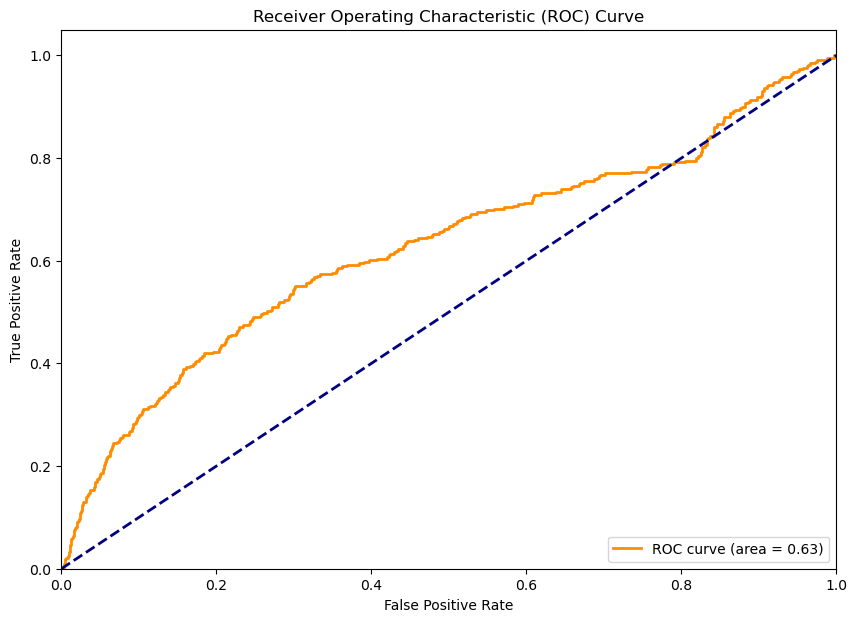

In [345]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Get false positive rate, true positive rate
fpr, tpr, _ = roc_curve(y_val.map({'yes': 1, 'no': 0}), y_val_prob)

# Plottiing the ROC curve To show the trade-off between the true positive rate and the false positive rate
plt.figure(figsize=(10,7))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {auc(fpr, tpr):.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


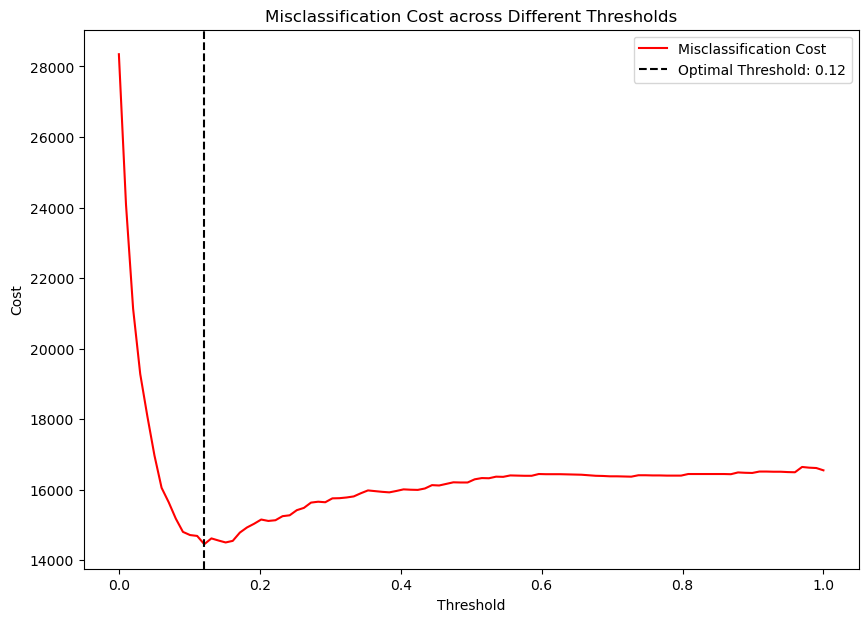

In [346]:
# Plotting the cost across different thresholds to help us understand how the misclassification cost changes across different thresholds
plt.figure(figsize=(10,7))
plt.plot(thresholds, costs, '-r', label='Misclassification Cost')
plt.xlabel('Threshold')
plt.ylabel('Cost')
plt.title('Misclassification Cost across Different Thresholds')
plt.legend()
plt.axvline(x=optimal_threshold, color='k', linestyle='--', label=f'Optimal Threshold: {optimal_threshold:.2f}')
plt.legend()
plt.show()


computing the confusion matrix to see how many True Positives (TP), True Negatives (TN), False Positives (FP), and False Negatives (FN) our model produced

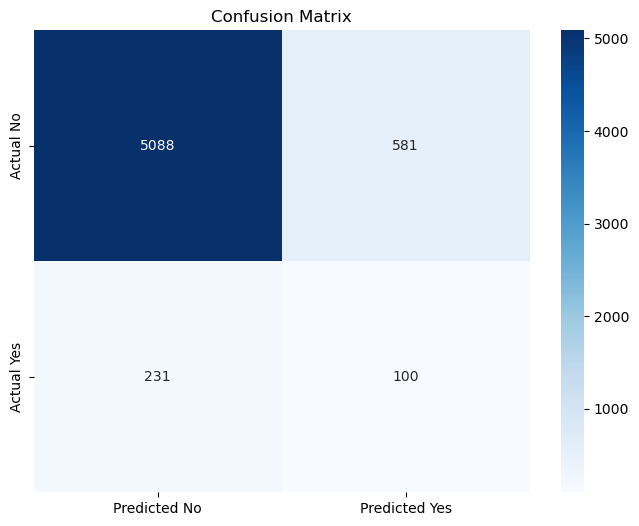

In [347]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Compute confusion matrix
cm = confusion_matrix(y_val, y_val_pred_optimal, labels=['no', 'yes'])

# Plot confusion matrix
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues", xticklabels=['Predicted No', 'Predicted Yes'], yticklabels=['Actual No', 'Actual Yes'])
plt.title("Confusion Matrix")
plt.show()


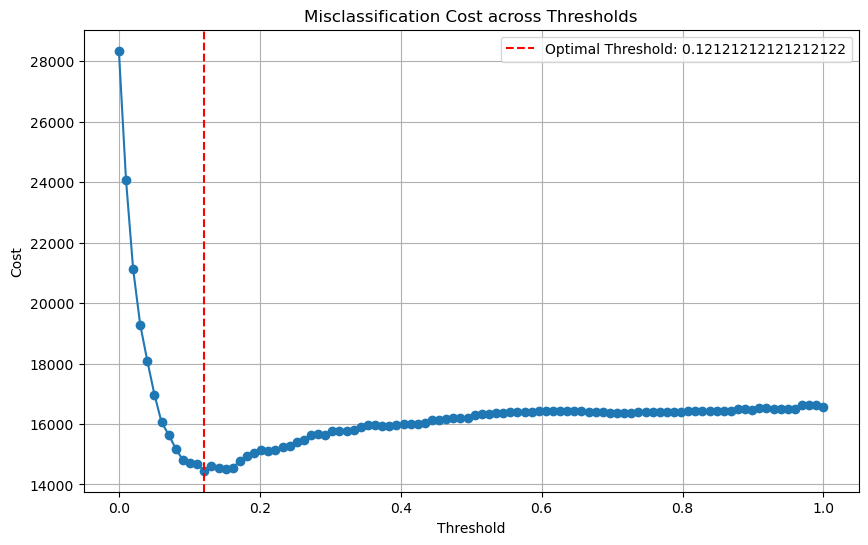

In [348]:
# plotting to check for the cost Across Thresholds
plt.figure(figsize=(10,6))
plt.plot(thresholds, costs, '-o')
plt.title("Misclassification Cost across Thresholds")
plt.xlabel("Threshold")
plt.ylabel("Cost")
plt.axvline(optimal_threshold, color='red', linestyle='--', label=f'Optimal Threshold: {optimal_threshold}')
plt.legend()
plt.grid(True)
plt.show()


# PART 2

In [349]:
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

# Fitting on training data and transform
test_data_scaled = scaler.fit_transform(test_data_encoded)




In [350]:
# Predict probabilities for the test set
y_test_prob = logreg.predict_proba(test_data_scaled)[:,1]

# Convert probabilities to class labels using the threshold (0.7 as determined before)
y_test_pred = (y_test_prob > 0.7).astype(int)

# Convert numeric predictions back to 'yes' and 'no'
y_test_pred_labels = ['yes' if pred == 1 else 'no' for pred in y_test_pred]


In [352]:
output_df = pd.DataFrame({
    'ORDER-ID': order_ids,
    'CLASS': y_test_pred_labels
})


In [353]:

output_df.to_csv('predicted_risk_orders.txt', index=False, sep='\t')
